In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from convert_fm import convert_ppm_to_Hz
from demod import demod_pls
from extract_metric import extract_metrics

### Measured db0_030 </br>
*Already been demodulated to its average on qmask. Only need to compute metric extraction from C2 to T7*

In [23]:
# Location of said FM:
demoded_romeo_measured_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz")
demoded_romeo_measured_data = demoded_romeo_measured_img.get_fdata()

In [24]:
path_to_measured_demod_fm = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz"
path_to_measured_sc_seg = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz"
path_to_measured_vertfile = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/corrected_maesured_cervical_vertfile_c2t7.nii.gz"
path_to_ISMRM_output_metrics = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/ISMRM/measured_db0_030_metrics.csv"

In [26]:
# Extracting metrics:
!sct_extract_metric -i {path_to_measured_demod_fm} -f  {path_to_measured_sc_seg} -method wa -vert 2:14 -vertfile {path_to_measured_vertfile} -perlevel 1 -o {path_to_ISMRM_output_metrics}


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero/demod_romeo_measured_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 2:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/corrected_maesured_cervical_vertfile_c2t7.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/ISMRM/measured_db0_030_metrics.csv
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/ISMRM/measure

### Simulated db0_030 processing (individually)

In [3]:
# New db0_030 FM must be converted
wb_db030_sim_fm_ppm_img = nib.load("C:/Users/User/msc_project/susceptibility-to-fieldmap-fft/data/debug_fftfix_beforeshiftcorr.nii.gz")
wb_db030_sim_fm_Hz_data = convert_ppm_to_Hz(wb_db030_sim_fm_ppm_img, B0=3)
wb_db030_sim_fm_Hz_img = nib.Nifti1Image(wb_db030_sim_fm_Hz_data, affine = wb_db030_sim_fm_ppm_img.affine)
nib.save(wb_db030_sim_fm_Hz_img, "C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/wb_db030_fftfix_sim_fm_Hz_img.nii.gz")

In [4]:
np.shape(wb_db030_sim_fm_Hz_img)

(192, 320, 841)

In [5]:
wb_db030_sim_box_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step_2_tissue_and_bone_masks/db0_030_wb_c2_t7_sim_st_bone.nii.gz")
wb_db030_sim_box_data = wb_db030_sim_box_mask_img.get_fdata()

In [33]:
demod_factor_sim_db0_030 = np.mean(wb_db030_sim_fm_Hz_data[wb_db030_sim_box_data==1])
print(demod_factor_sim_db0_030, 'Hz')

105.43078324065188 Hz


In [7]:
demoded_simulated_db0_030 = wb_db030_sim_fm_Hz_data - demod_factor_sim_db0_030

In [8]:
demoded_simulated_db0_030_img = nib.Nifti1Image(demoded_simulated_db0_030, affine = wb_db030_sim_fm_ppm_img.affine)

In [9]:
nib.save(demoded_simulated_db0_030_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/fftshift_bug/demod_fftshift_ISMRM_img.nii.gz")

In [2]:
path_to_demod_b0 = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/fftshift_bug/demod_fftshift_ISMRM_img.nii.gz"
path_to_sc_seg = "D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_sc_complete.nii.gz"
path_to_vert_levels = "D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_label_vertebrae_final.nii.gz"
path_to_output = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/fftshift_bug/simulated_db0_030_metrics.csv"

In [3]:
# Extracting metrics:
!sct_extract_metric -i {path_to_demod_b0} -f  {path_to_sc_seg} -method wa -vert 2:14 -vertfile {path_to_vert_levels} -perlevel 1 -o {path_to_output}


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/fftshift_bug/demod_fftshift_ISMRM_img.nii.gz -f D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_sc_complete.nii.gz -method wa -vert 2:14 -vertfile D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_label_vertebrae_final.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/fftshift_bug/simulated_db0_030_metrics.csv
--


Load metric image...
Estimation for label: t1w_wholebody_sc_complete

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/fftshift_bug/simulated_db0_030_metrics.csv



### Metric plotting

In [13]:
# Extracting already demodulated measured ROMEO :)
#path_to_avg_zero_demod_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_zero"
path_to_avg_zero_metrics_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/ISMRM"
avg_zero_measured_csv = os.path.join(path_to_avg_zero_metrics_folder, "measured_db0_030_metrics.csv")
avg_zero_demoded_measured_df = pd.read_csv(avg_zero_measured_csv)
avg_zero_demoded_measured_wa_data = avg_zero_demoded_measured_df['WA()']
avg_zero_demoded_measured_wa_data = avg_zero_demoded_measured_wa_data[::-1]

In [ ]:
# Loading for measured c2 - t7 metrics with corrected vertfile


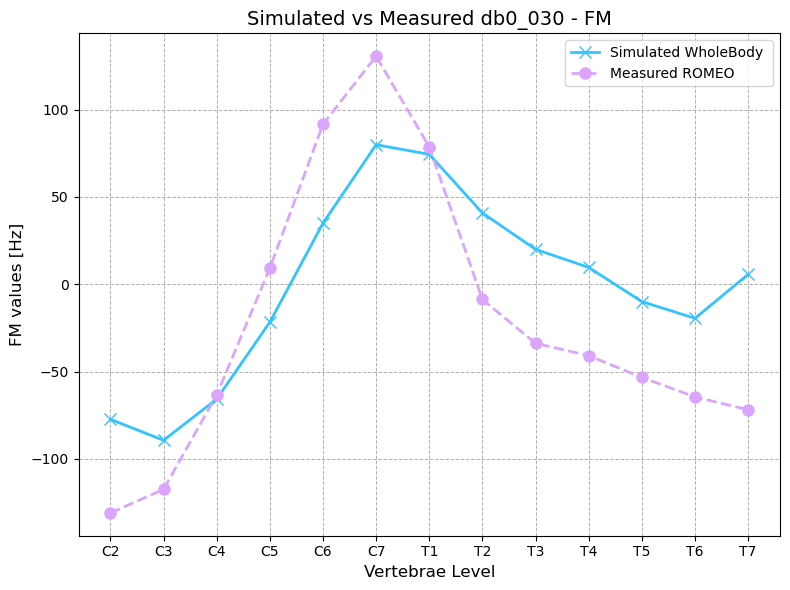

In [15]:
demod_db0_030_sim_csv = pd.read_csv(path_to_output)
df_demod_db0_030_sim = demod_db0_030_sim_csv['WA()']
df_demod_db0_030_sim = df_demod_db0_030_sim[::-1]

vertebrae_levels_c2_t7 = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

#
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c2_t7, df_demod_db0_030_sim , marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated WholeBody ')
plt.plot(vertebrae_levels_c2_t7, avg_zero_demoded_measured_wa_data, marker = 'o', color = '#DBA5FD', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")


# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Simulated vs Measured db0_030 - FM', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
from extract_metric import extract_metrics
# Example usage
path_to_demod_b0 = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/fftshift_bug/demod_fftshift_ISMRM_img.nii.gz"
path_to_sc_seg = "D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_sc_complete.nii.gz"
path_to_vert_levels = "D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_label_vertebrae_final.nii.gz"
path_to_output = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/test/simulated_db0_030_metrics.csv"

# Call the function
extract_metrics(path_to_demod_b0, path_to_sc_seg, path_to_vert_levels, path_to_output, method='wa', vert="2:14")

Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/fftshift_bug/demod_fftshift_ISMRM_img.nii.gz -f D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_sc_complete.nii.gz -method wa -vert 2:14 -vertfile D:/UNF_data/2024_08_23/slicer_work/t1w_wholebody_label_vertebrae_final.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/test/simulated_db0_030_metrics.csv
--


Load metric image...
Estimation for label: t1w_wholebody_sc_complete

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/test/simulated_db0_030_metrics.csv




# Example using all custom python scripts! </br>
1. Create your desired amount of chi-maps with different chi value for a region of interest with converter repo </br>
2. Compute the db0 map with fbfest code in python </br>
*Important: Beware of the branch and hash were running the the computation - Until stable*
3. Specify the template of the name for each fieldmap </br>
*Note, chi value of internal air is in a range of 0.5 to -9*  </br>
4. Before running the for loop over chi list. Load the mask where you want to calculate the average, as well as the vert_file to extract metrics </br>
5. Convert from PPM to Hz specifying the B0 strength

In [2]:
# List of chi values used for plotting
chi_list = [0.4, -2.65, -4.2] # One missing for the optimized value 
# Template for name in ISMRMR 2025 project ==> "db0_sim_0_4_fm_ppm.nii.gz"
demodulating_mask_img = nib.load("data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_dilate2_10.nii.gz")
demodulating_mask_data = demodulating_mask_img.get_fdata()

ismrm_sc_seg_path = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_c2t7_final_ISMRM.nii.gz"
ismrm_vert_file_path = "data/lung_fitting_project/manually_simulated/ismrm_2025_fms/t1w_wholebody_label_vertebrae_final cropped.nii.gz"


In [4]:
path_to_ppm_fm_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/current_version"
path_to_demod_fm_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/demod/"
path_to_metrics_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/metrics/"

for chi in chi_list:
    chi_name = str(chi).replace(".","_").strip("-")
    name = f"db0_sim_{chi_name}_fm_ppm.nii.gz"
    path_to_fm = os.path.join(path_to_ppm_fm_folder,name)
    #print(path_to_fm)
    # Defining output for demodulated // extract metrics
    out_fn_demod = f"demod_db0_sim_{chi_name}_fm_Hz.nii.gz"
    out_fn_metrics = f"metrics_db0_sim_{chi_name}_fm_Hz.csv"

    # Load fm and get data
    fm_ppm_img = nib.load(path_to_fm)
    fm_ppm_data = fm_ppm_img.get_fdata()
    fm_Hz_data = convert_ppm_to_Hz(fm_ppm_img,B0=3)

    # Once its in Hz, we have to demodulate it - average to zero in the mask -> Print and save
    demod_factor = np.mean(fm_Hz_data[demodulating_mask_data == 1])
    print("Demoded",name," with: ", demod_factor," Hz")
    demod_fm_Hz = fm_Hz_data - demod_factor
    
    demod_fm_Hz_img = nib.Nifti1Image(demod_fm_Hz,affine=fm_ppm_img.affine)
    demod_fm_Hz_path = os.path.join(path_to_demod_fm_folder, out_fn_demod)
    nib.save(demod_fm_Hz_img, demod_fm_Hz_path)

    # Now, compute metrics with the vertfile
    # We need to get the path of the recently created demodulated FM
    metrics_outpath = os.path.join(path_to_metrics_folder,out_fn_metrics)
    extract_metrics(demod_fm_Hz_path,ismrm_sc_seg_path,ismrm_vert_file_path,metrics_outpath,"wa","2:14")
    print("###########################################################################################")
    

Demoded db0_sim_0_4_fm_ppm.nii.gz  with:  -298.6840167243891  Hz
Metrics extracted successfully: 
--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/demod/demod_db0_sim_0_4_fm_Hz.nii.gz -f data/lung_fitting_project/manually_simulated/ismrm_2025_fms/sc_seg_c2t7_final_ISMRM.nii.gz -method wa -vert 2:14 -vertfile data/lung_fitting_project/manually_simulated/ismrm_2025_fms/t1w_wholebody_label_vertebrae_final cropped.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/metrics/metrics_db0_sim_0_4_fm_Hz.csv
--


Load metric image...
Estimation for label: sc_seg_c2t7_final_ISMRM

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/metrics/metrics_db0_si

In [5]:
# Fetching data from avg_zero measured CSV
path_to_avg_zero_metrics_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/ISMRM"
avg_zero_measured_csv = os.path.join(path_to_avg_zero_metrics_folder, "measured_db0_030_metrics.csv")
avg_zero_demoded_measured_df = pd.read_csv(avg_zero_measured_csv)
avg_zero_demoded_measured_wa_data = avg_zero_demoded_measured_df['WA()']
avg_zero_demoded_measured_wa_data = avg_zero_demoded_measured_wa_data[::-1]

In [17]:
path_to_old_metrics_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/ismrm_2025_fms/no_skull_no_brain/metrics_no_skull_brain"

<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_11808\2384917009.py:30: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(vertebrae_levels_c2_t7, column_data, marker='o',linestyle='--',label=f'$\chi$: {sim_value}', color=colors[color_index % len(colors)])
C:\Users\User\AppData\Local\Temp\ipykernel_11808\2384917009.py:36: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(vertebrae_levels_c2_t7, test , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='S&B $\chi$ -4.2 ')


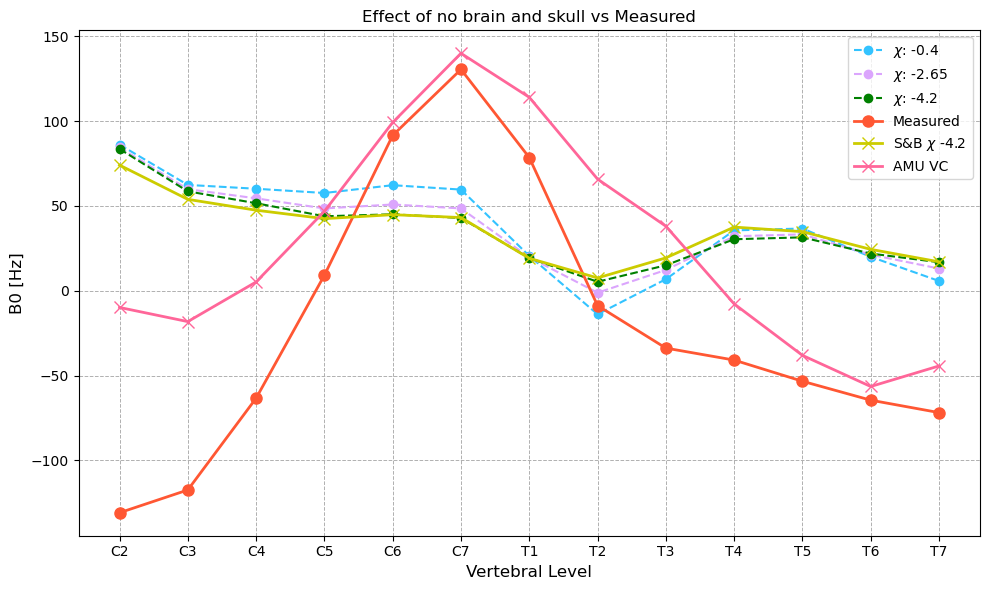

In [21]:
import re 
# Need regex :D Hard but worth
vertebrae_levels_c2_t7 = [ 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
# Initialize the plot
plt.figure(figsize=(10, 6))
colors = ['#33C3FF','#DBA5FD','#008000','#4d79ff','996633']
color_index = 0

# Loop through each file in the folder
for filename in os.listdir(path_to_old_metrics_folder):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(path_to_old_metrics_folder, filename)
        
        match = re.search(r'sim_([0-9_]+)_fm_Hz', filename)
        if match:
            sim_value = match.group(1).replace('_', '.')  # Convert '0_4' to '0.4' for the label
            # If the number is > 0 it was a negative number (for the ISMRM project only)
            if float(sim_value)>0:
                sim_value = f"-{sim_value}"

        # Load the CSV file
        data = pd.read_csv(file_path)
        
        # Extract the column you want to plot
        column_name = 'WA()'  # Replace with the actual column name
        column_data = data[column_name]
        column_data = column_data[::-1]
        # Plot the column data
        plt.plot(vertebrae_levels_c2_t7, column_data, marker='o',linestyle='--',label=f'$\chi$: {sim_value}', color=colors[color_index % len(colors)]) 
        color_index += 1

plt.plot(vertebrae_levels_c2_t7, avg_zero_demoded_measured_wa_data, marker = 'o', color = '#FF5733', linestyle='-', linewidth = 2, markersize = 8, label = "Measured")
#plt.plot(vertebrae_levels_c2_t7, df_demod_db0_030_sim , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated MATHIEU')
test = [74.12, 53.92, 47.52, 42.54, 44.88, 43.19, 19.17, 7.57, 19.40, 37.56, 34.87, 24.43, 17.08]
plt.plot(vertebrae_levels_c2_t7, test , marker = 'x', color = '#cccc00', linestyle='-', linewidth = 2, markersize = 8, label ='S&B $\chi$ -4.2 ')

amu = [-9.83, -18.18, 5.2, 46.88, 99.27, 140.05, 114.10, 65.87, 38.09, -7.72, -38.09,-56.45, -44.33]
plt.plot(vertebrae_levels_c2_t7, amu , marker = 'x', color = '#ff6699', linestyle='-', linewidth = 2, markersize = 8, label ='AMU VC')
# Adding the C2T7 measured data 
plt.title('Effect of no brain and skull vs Measured')
plt.xlabel('Vertebral Level', fontsize=12)
plt.ylabel('B0 [Hz]', fontsize=12)
plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Lading the csv files and plotting!

demod_db0_030_sim_csv = pd.read_csv(path_to_output)
df_demod_db0_030_sim = demod_db0_030_sim_csv['WA()']
df_demod_db0_030_sim = df_demod_db0_030_sim[::-1]


In [ ]:
# Not demodulated
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c2_t7, df_demod_db0_030_sim , marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Simulated WholeBody ')
plt.plot(vertebrae_levels_c2_t7, avg_zero_demoded_measured_wa_data, marker = 'o', color = '#DBA5FD', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")


# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Simulated vs Measured db0_030 - FM', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
path_to_ppm_fm_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/xmanually_simulated/ismrm_2025_fms"